In [2]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, TerminateOnNaN
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [3]:



train = pd.read_csv(r"H:\Sem-7\CS5691\Assignment-3\Datasets\Dataset3\train.csv")
test  = pd.read_csv(r"H:\Sem-7\CS5691\Assignment-3\Datasets\Dataset3\test.csv")

x_train = train[["x1", "x2"]].to_numpy(dtype=np.float32)
y_train = train["label"].to_numpy(dtype=np.int32)
x_test  = test[["x1", "x2"]].to_numpy(dtype=np.float32)
y_test  = test["label"].to_numpy(dtype=np.int32)



In [12]:
num_classes = len(np.unique(y_train))
y_train_oh = to_categorical(y_train, num_classes)
y_test_oh  = to_categorical(y_test, num_classes)

model = Sequential([
    Dense(12, activation="tanh", input_shape=(x_train.shape[1],)),
    Dense(8, activation="tanh"),
    Dense(num_classes, activation="softmax")
])

sgd = SGD(learning_rate=0.07, momentum=0.9)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

es = EarlyStopping(monitor="loss", min_delta=1e-3, patience=3, restore_best_weights=True)

history = model.fit(
    x_train, y_train_oh,
    batch_size=8,
    epochs=100,
    shuffle=True,
    # callbacks=[es],
    verbose=1
)


Epoch 1/100


c:\Users\hrush\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6928 - loss: 0.6132
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7186 - loss: 0.6024
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7204 - loss: 0.6050
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7222 - loss: 0.5848
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7195 - loss: 0.6013
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7035 - loss: 0.6086
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7150 - loss: 0.6097
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6874 - loss: 0.6364
Epoch 9/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7061 - loss: 0.6163
Epoch 10/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7320 - loss: 0.5837
Epoch 11/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6972 - loss: 0.6090
Epoch 12/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

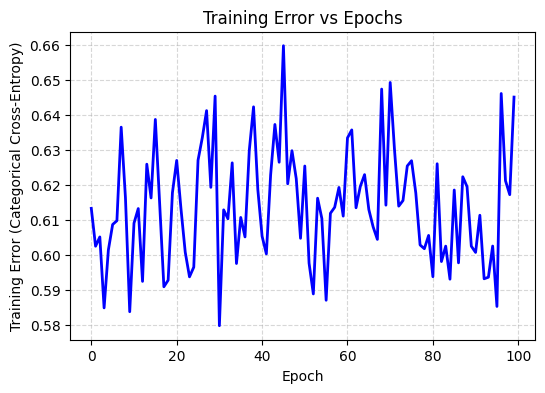

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], color='blue', linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Training Error (Categorical Cross-Entropy)")
plt.title("Training Error vs Epochs")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


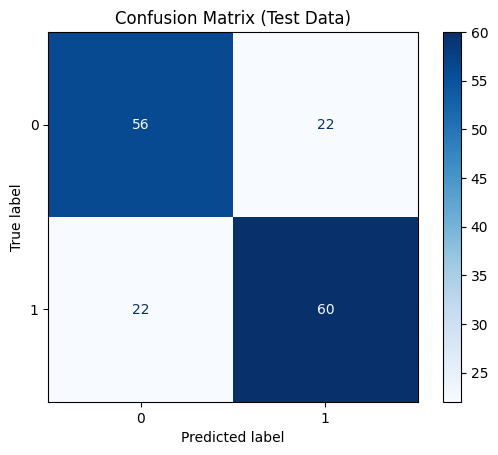

In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_probs = model.predict(x_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', colorbar=True)
plt.title("Confusion Matrix (Test Data)")
plt.show()


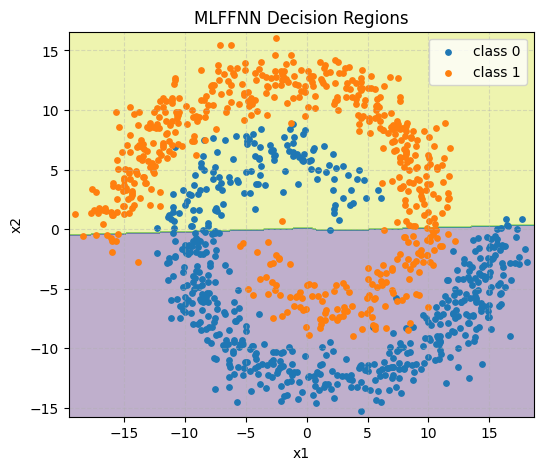

In [15]:
import numpy as np
import matplotlib.pyplot as plt

X = x_train.to_numpy(dtype=np.float32) if hasattr(x_train, "to_numpy") else np.asarray(x_train, dtype=np.float32)
y = y_train.to_numpy(dtype=np.int32).ravel() if hasattr(y_train, "to_numpy") else np.asarray(y_train, dtype=np.int32).ravel()

x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 400),
    np.linspace(y_min, y_max, 400)
)
grid = np.c_[xx.ravel(), yy.ravel()].astype(np.float32)

probs = model.predict(grid, verbose=0)
if probs.shape[1] == 1:
    Z = (probs.ravel() >= 0.5).astype(int)
else:
    Z = np.argmax(probs, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.35)

classes = np.unique(y)
for cls in classes:
    pts = X[y == cls]
    plt.scatter(pts[:,0], pts[:,1], s=15, label=f"class {cls}")

plt.title("MLFFNN Decision Regions")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc="best")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()
